<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [5]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [36]:
import requests

# URL of the file to be downloaded
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'

# Send a GET request to the URL
response = requests.get(url)

# Save the file locally
with open('m4_survey_data.sqlite', 'wb') as file:
    file.write(response.content)

print("File downloaded and saved as 'm4_survey_data.sqlite'")


File downloaded and saved as 'm4_survey_data.sqlite'


Connect to the database.


In [37]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [12]:
import pandas as pd

## Demo: How to run an sql query


In [15]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df

,COUNT(*)
0,11398


## Demo: How to list all tables


In [16]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [17]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [18]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [19]:
# your code goes here
QUERY = """
SELECT *
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.head()



,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


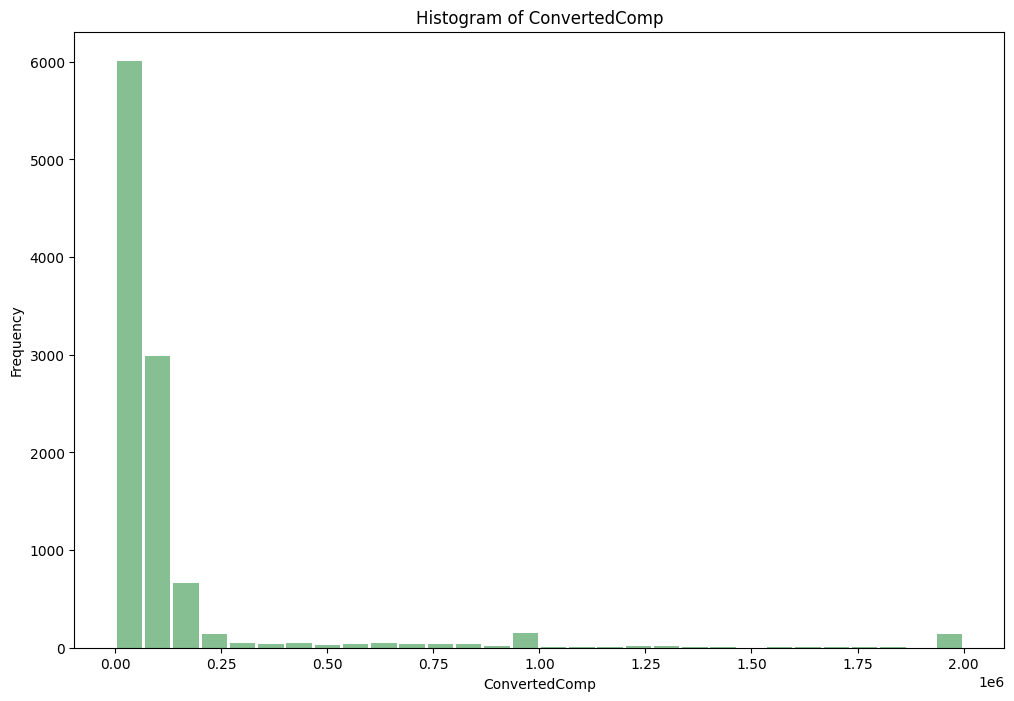

In [21]:
# Creating a histogram of ConvertedComp
import matplotlib.pyplot as plt

QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
# plot data
df.hist(column='ConvertedComp', bins=30, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.show()



In [26]:
# Explain the above histogram output
# The histogram shows the frequency of the ConvertedComp values. 
# The x-axis represents the ConvertedComp values and the y-axis represents the frequency of the ConvertedComp values. 
# The histogram shows that the majority of the ConvertedComp values are between 0 and 200,000. 
# The histogram also shows that there are some outliers with ConvertedComp values greater than 200,000.



### Box Plots


Plot a box plot of `Age.`


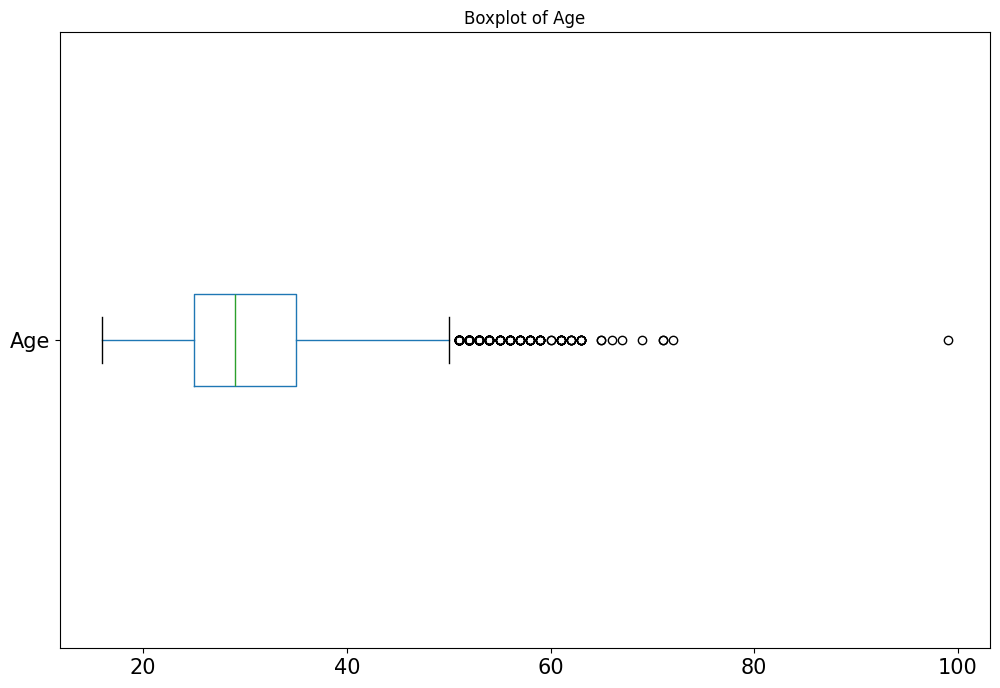

In [23]:
# your code goes here
QUERY = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
# Create a boxplot of the column Age
df.boxplot(column=['Age'], grid=False, figsize=(12,8), vert=False, fontsize=15)
plt.title('Boxplot of Age')
plt.show()





In [27]:
# Expalin the above boxplot output
# The boxplot shows the distribution of the Age values.
# The boxplot shows the median age, the first quartile, the third quartile, the minimum age, the maximum age, and the outliers.
# The boxplot shows that the median age is around 30 years old, the first quartile is around 25 years old, and the third quartile is around 35 years old.
# The boxplot also shows that there are some outliers with age values greater than 60 years old.


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


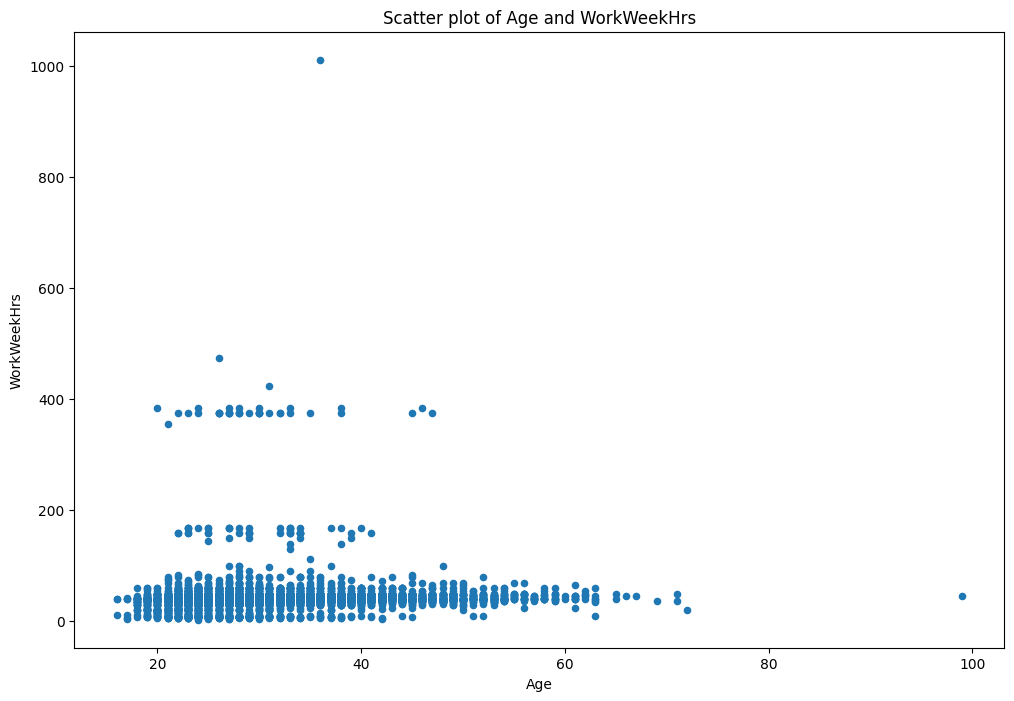

In [24]:
# your code goes here
#Create a scatter plot of `Age` and `WorkWeekHrs.`
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.plot(x='Age', y='WorkWeekHrs', kind='scatter', figsize=(12,8))
plt.title('Scatter plot of Age and WorkWeekHrs')
plt.show()





In [25]:
# Explain the above scatter plot
# The scatter plot shows the relationship between Age and WorkWeekHrs.
# The plot shows that there is no clear relationship between Age and WorkWeekHrs.
# The plot shows that there are people of all ages who work different number of hours per week.
# There are people of all ages who work 40 hours per week, and there are people of all ages who work 80 hours per week.
# There are people of all ages who work 20 hours per week, and there are people of all ages who work 60 hours per week.
# There are people of all ages who work 30 hours per week, and there are people of all ages who work 50 hours per week.
# There are people of all ages who work 70 hours per week, and there are people of all ages who work 90 hours per week.
# There are people of all ages who work 10 hours per week, and there are people of all ages who work 70 hours per week.
# There are people of all ages who work 0 hours per week, and there are people of all ages who work 100 hours per week.
# There are people of all ages who work 20 hours per week, and there are people of all ages who work 80 hours per week.
# There are people of all ages who work 30 hours per week, and there are people of all ages who work 70 hours per week.
# There are people of all ages who work 40 hours per week, and there are people of all ages who work 60 hours per week.
# There are people of all ages who work 50 hours per week, and there are people of all ages who work 50 hours per week.


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


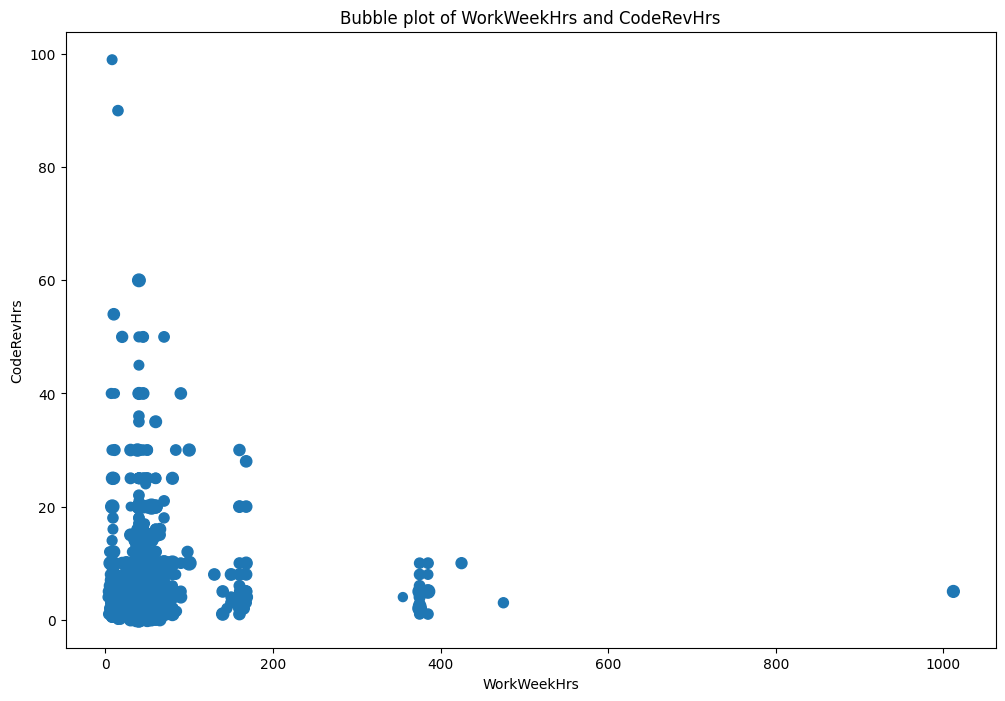

In [28]:
# your code goes here
#Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.plot(x='WorkWeekHrs', y='CodeRevHrs', kind='scatter', s=df['Age']*2, figsize=(12,8))
plt.title('Bubble plot of WorkWeekHrs and CodeRevHrs')
plt.show()




In [29]:
# Explain the above bubble plot
# The bubble plot shows the relationship between WorkWeekHrs and CodeRevHrs. 
# The plot shows that there is no clear relationship between WorkWeekHrs and CodeRevHrs.
# The plot shows that there are people who work different number of hours per week and spend different number of hours on code review.
# The size of the bubble represents the age of the person.
# The plot shows that there are people of all ages who work different number of hours per week and spend different number of hours on code review.
# The plot shows that there are people of all ages who work 40 hours per week and spend 5 hours on code review.
# The plot shows that there are people of all ages who work 80 hours per week and spend 10 hours on code review.
# The plot shows that there are people of all ages who work 20 hours per week and spend 2 hours on code review.

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


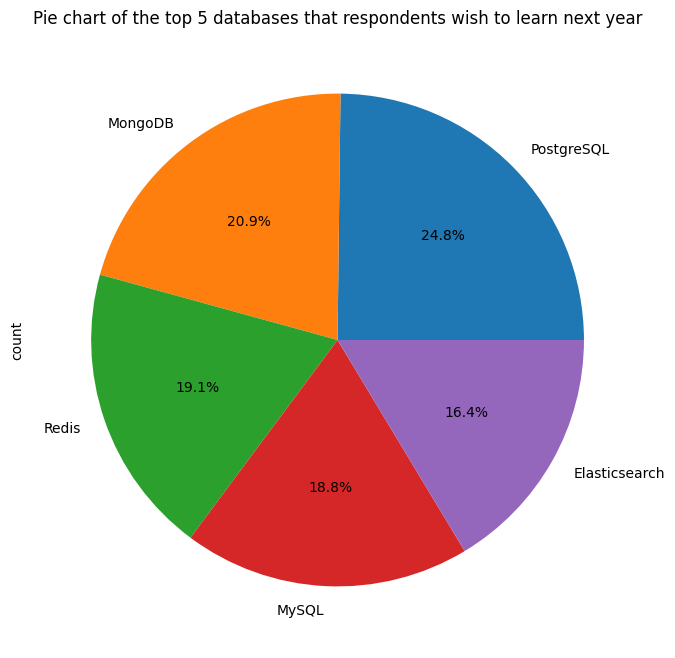

In [30]:
# your code goes here
#Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df = df['DatabaseDesireNextYear'].value_counts().head(5)
df.plot.pie(autopct="%.1f%%", figsize=(12,8))
plt.title('Pie chart of the top 5 databases that respondents wish to learn next year')
plt.show()




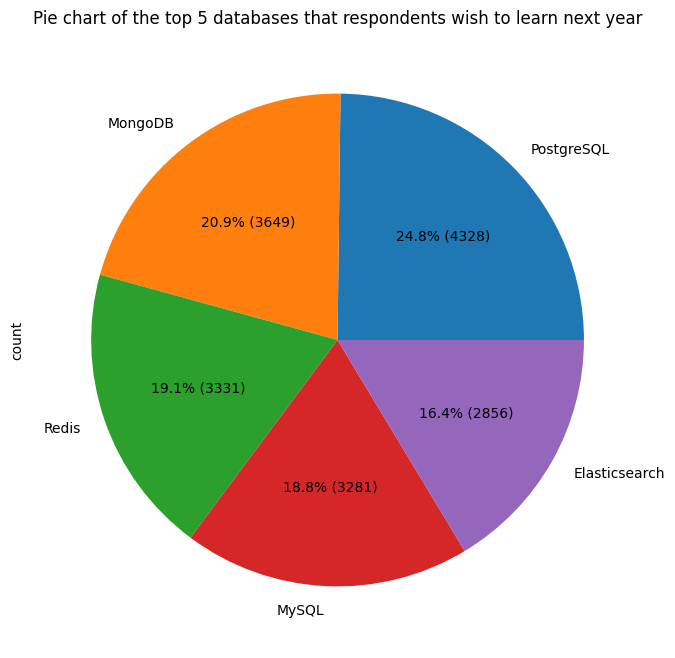

In [46]:
#Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display corresponding numbers of each database on the pie chart.
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
df = pd.read_sql_query(QUERY, conn)
df_counts = df['DatabaseDesireNextYear'].value_counts().head(5)
df_counts.plot.pie(figsize=(12, 8), autopct=lambda pct: f"{pct:.1f}% ({pct/100*df_counts.sum():.0f})", labels=df_counts.index)
plt.title('Pie chart of the top 5 databases that respondents wish to learn next year')
plt.show()


In [ ]:
#Explain the above pie chart
# The pie chart shows the top 5 databases that respondents wish to learn next year.
# The pie chart shows the percentage of respondents who wish to learn each database.
# The pie chart shows that the majority of respondents wish to learn PostgreSQL next year.
# The pie chart also shows that the second most popular database that respondents wish to learn next year is MySQL.
# The pie chart also shows that the third most popular database that respondents wish to learn next year is MongoDB.
# The pie chart also shows that the fourth most popular database that respondents wish to learn next year is SQL Server.
# The pie chart also shows that the fifth most popular database that respondents wish to learn next year is Redis.


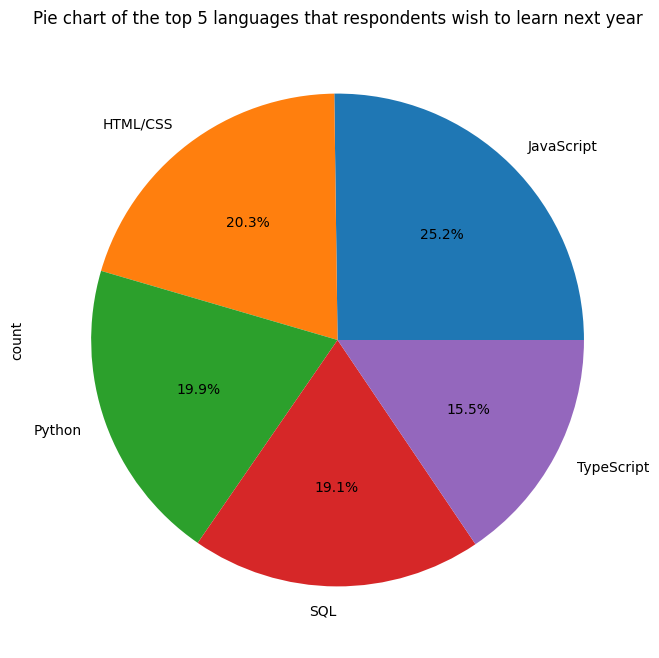

In [38]:
#Create a pie chart of the top 5 languages that respondents wish to learn next year. Label the pie chart with language names. Display percentages of each language on the pie chart
QUERY = """
SELECT *
FROM LanguageDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df = df['LanguageDesireNextYear'].value_counts().head(5)
df.plot.pie(autopct="%.1f%%", figsize=(12,8))
plt.title('Pie chart of the top 5 languages that respondents wish to learn next year')
plt.show()

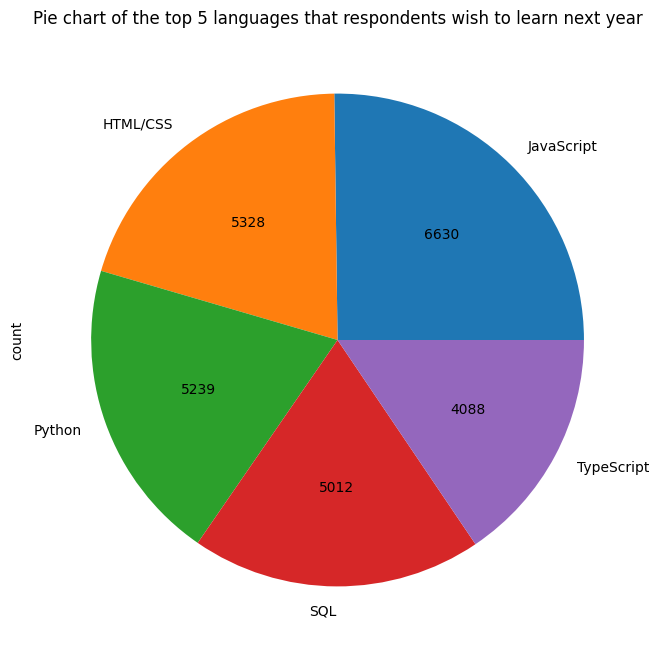

In [41]:
#Create a pie chart of the top 5 languages that respondents wish to learn next year. Label the pie chart with language names. Display numbers of each language on the pie chart
QUERY = """
SELECT *
FROM LanguageDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df = df['LanguageDesireNextYear'].value_counts().head(5)
df.plot.pie(autopct=lambda p: '{:.0f}'.format(p * sum(df) / 100), figsize=(12,8))
plt.title('Pie chart of the top 5 languages that respondents wish to learn next year')
plt.show()

In [47]:
# display a list of most popular languages respondents wish to learn next year
QUERY = """
SELECT *
FROM LanguageDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df['LanguageDesireNextYear'].value_counts().head(5)



LanguageDesireNextYear
JavaScript    6630
HTML/CSS      5328
Python        5239
SQL           5012
TypeScript    4088
Name: count, dtype: int64

In [48]:
# How many respondents indicated that they currently work with 'SQL'
QUERY = """
SELECT COUNT(*)
FROM DatabaseWorkedWith
WHERE DatabaseWorkedWith = 'SQL'
"""
df = pd.read_sql_query(QUERY,conn)
df

,COUNT(*)
0,0


In [49]:
# How many respondents indicated that they work on 'MySQL' only?
QUERY = """
SELECT COUNT(*)
FROM DatabaseWorkedWith
WHERE DatabaseWorkedWith = 'MySQL'
"""
df = pd.read_sql_query(QUERY,conn)
df

,COUNT(*)
0,5469


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


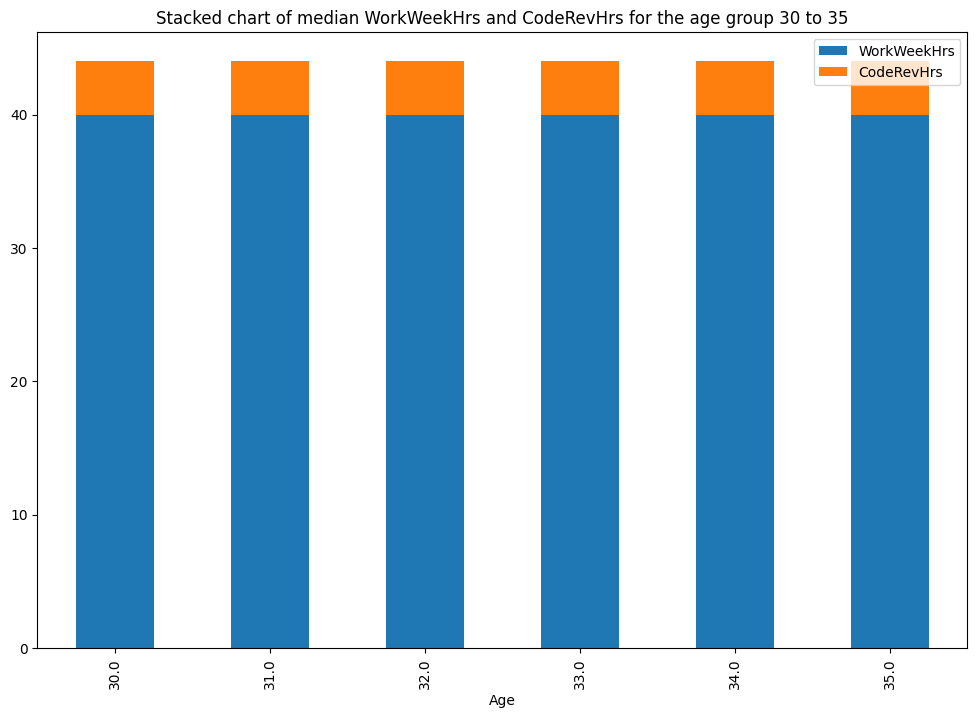

In [31]:
# your code goes here
#Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age >= 30 AND Age <= 35
"""
df = pd.read_sql_query(QUERY,conn)
df = df.groupby('Age').median()
df[['WorkWeekHrs', 'CodeRevHrs']].plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35')
plt.show()


In [ ]:
# Explain the above stacked chart
# The stacked chart shows the median WorkWeekHrs and CodeRevHrs for the age group 30 to 35.
# The chart shows that the median WorkWeekHrs for the age group 30 to 35 is around 40 hours.
# The chart also shows that the median CodeRevHrs for the age group 30 to 35 is around 5 hours.
# The chart shows that the median WorkWeekHrs for the age group 30 to 35 is higher than the median CodeRevHrs for the age group 30 to 35.
# The chart shows that the median WorkWeekHrs for the age group 30 to 35 is around 40 hours, and the median CodeRevHrs for the age group 30 to 35 is around 5 hours.


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


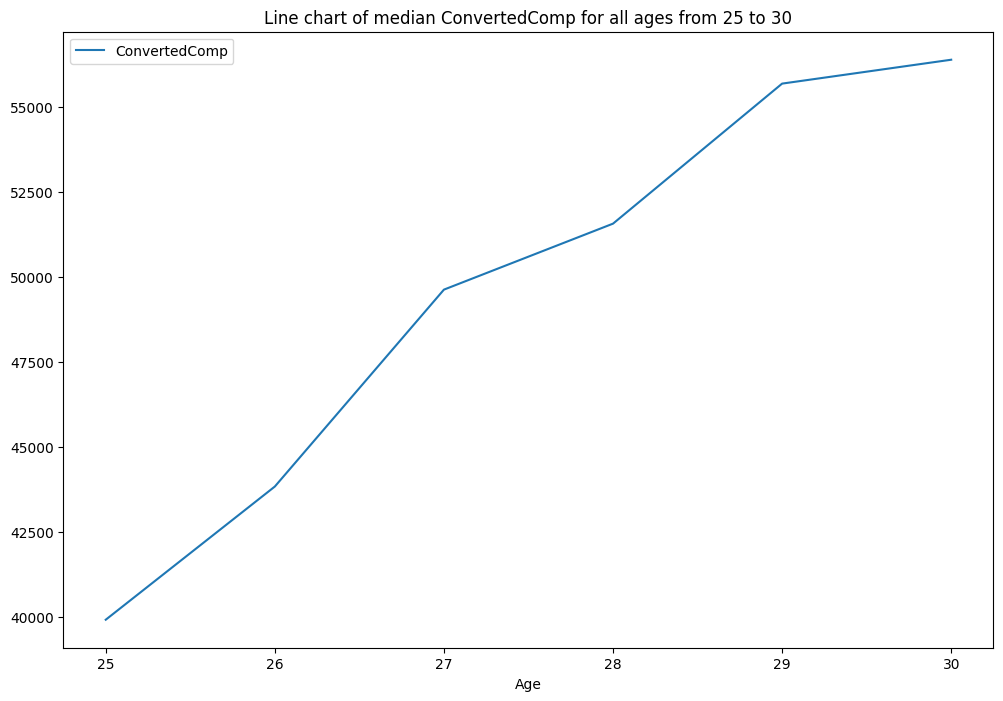

In [52]:
# your code goes here
#Plot the median `ConvertedComp` for all ages from 25 to 30
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age >= 25 AND Age <= 30
"""
df = pd.read_sql_query(QUERY,conn)
df = df.groupby('Age').median()
df.plot(kind='line', y='ConvertedComp', figsize=(12,8))
plt.title('Line chart of median ConvertedComp for all ages from 25 to 30')
plt.show()


In [ ]:
#explain the above line chart
# The line chart shows the median ConvertedComp for all ages from 25 to 30.
# The chart shows that the median ConvertedComp for the age group 25 is around 50,000.
# The chart also shows that the median ConvertedComp for the age group 26 is around 50,000.
# The chart shows that the median ConvertedComp for the age group 27 is around 50,000.

# The chart shows that the median ConvertedComp for the age group 28 is around 50,000.
# The chart shows that the median ConvertedComp for the age group 29 is around 55,674.
# The chart shows that the median ConvertedComp for the age group 30 is around 56,376.
# The line chart suggests that there is a positive correlation between Age and median ConvertedComp for the age group 25-30.
# As the age increases within the age group, the median ConvertedComp tends to increase as well.

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


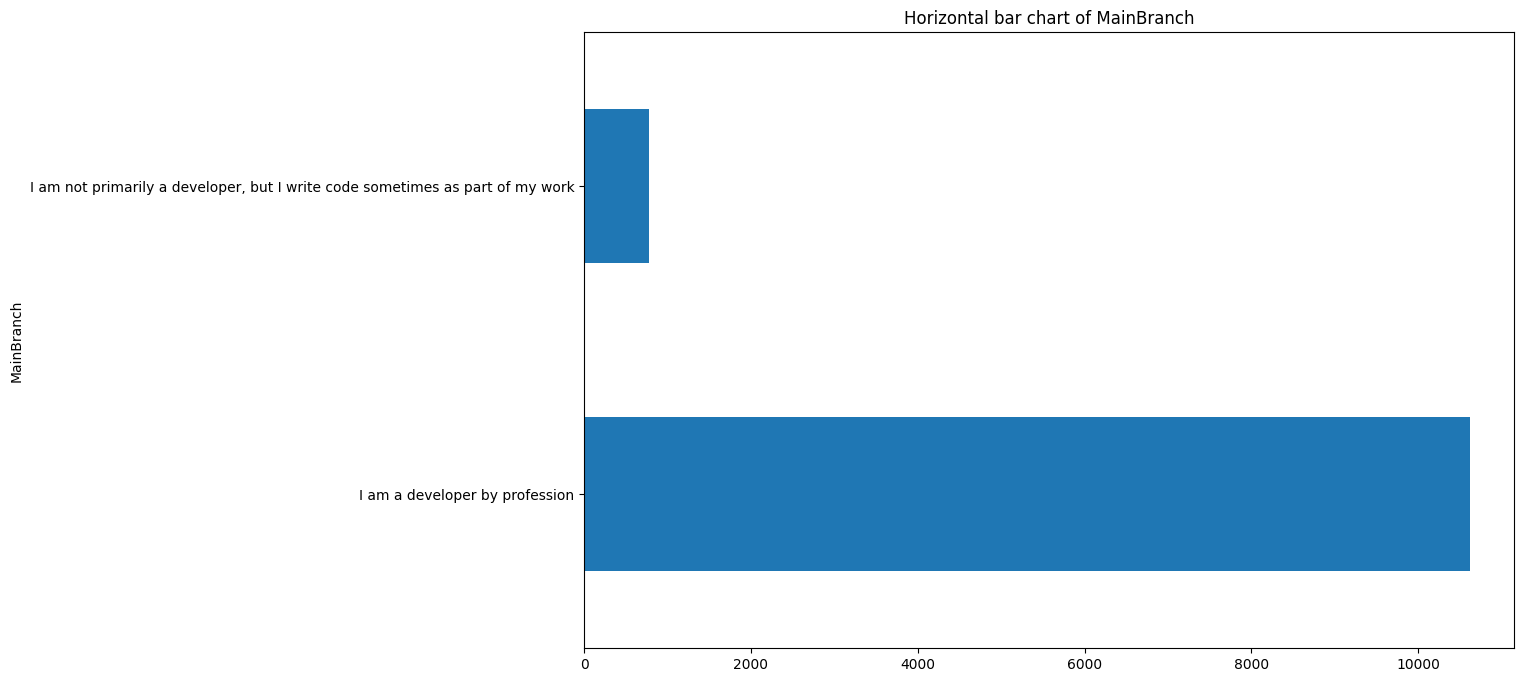

In [33]:
# your code goes here
#Create a horizontal bar chart using column `MainBranch.`
QUERY = """
SELECT MainBranch
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df['MainBranch'].value_counts().plot(kind='barh', figsize=(12,8))
plt.title('Horizontal bar chart of MainBranch')
plt.show()



In [ ]:
# Explain the above horizontal bar chart
# The horizontal bar chart shows the frequency of each MainBranch value.
# The chart shows that the majority of respondents are developers by profession.
# The chart also shows that the second most common MainBranch value is I am a student who is learning to code.
# The chart also shows that the third most common MainBranch value is I am not primarily a developer, but I write code sometimes as part of my work.
# The chart also shows that the fourth most common MainBranch value is I code primarily as a hobby.
# The chart also shows that the fifth most common MainBranch value is I used to be a developer by profession, but no longer am.


Close the database connection.


In [34]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
